In [9]:
#Importing necessary modules
import os
import csv
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint
#Setting up parameters for the API Key
api_key='KMXu7o4jj9H_5fBmmoxcQUXUcjaIiDMpnabg34SZhyJUQPt-H6y8sfBIq8jI65xOovUH7cKhDpTUnvK2UIFOf1r5864boyx0PCcIwR4QQ1OeR8IWr5RO7UxW3HJoXXYx'
headers = {'Authorization': 'Bearer %s' % api_key}
#Defining the Business Search end point url
url='https://api.yelp.com/v3/businesses/search'

In [13]:
# In the dictionary, term can take values like food, cafes or businesses like McDonalds
# Pulling Restaurant reviews for 4 major Cities 
cities =['new york city','san francisco','houston','chicago']
restaurants = []
for city in cities:
    #Pulling 1000 responses for each City ( as 1000 is the allowed limit)
    for offset in range(0,1000,50):
        params = {'term':'restaurants','location':city,'sort_by':'distance','limit':50, 'offset':offset}
        response = requests.get(url, params=params, headers=headers).json()
#         bussearch_response_json = response.json()
        restaurants.append(dict(response))

In [14]:
pprint(restaurants[1])

{'businesses': [{'alias': 'love-and-dough-dumbo',
                 'categories': [{'alias': 'pizza', 'title': 'Pizza'},
                                {'alias': 'italian', 'title': 'Italian'}],
                 'coordinates': {'latitude': 40.7030253,
                                 'longitude': -73.9874284},
                 'display_phone': '(347) 987-3404',
                 'distance': 638.1569588393181,
                 'id': 'VG6Lhgcq5AHP-kklGTCbTQ',
                 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/bvncukV1VDNbTLdAIfL-mw/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '57 Pearl St',
                              'address2': '',
                              'address3': '',
                              'city': 'DUMBO',
                              'country': 'US',
                              'display_address': ['57 Pearl St',
                                                  'DUMBO, NY 11201'],
                      

                 'location': {'address1': '41 Monroe St',
                              'address2': '',
                              'address3': '',
                              'city': 'New York',
                              'country': 'US',
                              'display_address': ['41 Monroe St',
                                                  'New York, NY 10002'],
                              'state': 'NY',
                              'zip_code': '10002'},
                 'name': "CC's Cafe",
                 'phone': '+12125711060',
                 'price': '$$',
                 'rating': 4.5,
                 'review_count': 133,
                 'transactions': ['pickup', 'delivery'],
                 'url': 'https://www.yelp.com/biz/ccs-cafe-new-york-2?adjust_creative=PR-SYvR1gRsEOO-jJ-FdTA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=PR-SYvR1gRsEOO-jJ-FdTA'},
                {'alias': 'bread-and-spread-dumbo',
                 'cat

                              'country': 'US',
                              'display_address': ['S St Seaport',
                                                  'New York, NY 10038'],
                              'state': 'NY',
                              'zip_code': '10038'},
                 'name': 'Parked! Food Truck Festival',
                 'phone': '',
                 'price': '$$',
                 'rating': 3.5,
                 'review_count': 5,
                 'transactions': [],
                 'url': 'https://www.yelp.com/biz/parked-food-truck-festival-new-york?adjust_creative=PR-SYvR1gRsEOO-jJ-FdTA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=PR-SYvR1gRsEOO-jJ-FdTA'},
                {'alias': 'bluestone-lane-brooklyn',
                 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'},
                                {'alias': 'gluten_free',
                                 'title': 'Gluten-Free'},
                           

In [94]:
#Defining empty dictionary to save only required elements
final = {}
#Defining Empty list to append all the data 
data = []
for restaurant in restaurants:
    for item in restaurant['businesses']:
        final['Name'] = item['name']
        final['City'] = item['location']['city']
        final['Rating'] = item['rating']
        final['Reviews'] = item['review_count']
        final['Categories_list'] = item['categories']
        #Exception handling for Price
        try:
            final['Price'] = item['price']
        except:
            final['Price'] = float('nan')
        data.append(dict(final))
        


In [95]:
#Creating a DataFrame to save the Rating,Reviews , Price etc 5000 restaurants per City
restaurants_df = pd.DataFrame(data)
restaurants_df.head()

,Categories_list,City,Name,Price,Rating,Reviews
0,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",Brooklyn,Born & Raised NYC,$,4.5,6
1,"[{'alias': 'sandwiches', 'title': 'Sandwiches'}]",New York,Landhaus,NaN,4.0,1
2,"[{'alias': 'seafood', 'title': 'Seafood'}]",Brooklyn,Luke's Lobster Brooklyn Bridge Park,$$,4.0,303
3,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",Brooklyn,Sugarcane Raw Bar Grill,$$$,4.0,508
4,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",Brooklyn,Calexico Taco / Burrito Cart,$,3.5,28


In [80]:
#Dropping Nan values
restaurants_df.dropna(axis='index',how='any',inplace=True)
restaurants_df.reset_index(drop=True)

,Categories,City,Name,Price,Rating,Reviews
0,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",Brooklyn,Born & Raised NYC,$,4.5,6
1,"[{'alias': 'seafood', 'title': 'Seafood'}]",Brooklyn,Luke's Lobster Brooklyn Bridge Park,$$,4.0,303
2,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",Brooklyn,Sugarcane Raw Bar Grill,$$$,4.0,508
3,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",Brooklyn,Calexico Taco / Burrito Cart,$,3.5,28
4,"[{'alias': 'pizza', 'title': 'Pizza'}]",Brooklyn,Ignazio's,$$,3.0,497
5,"[{'alias': 'newamerican', 'title': 'American (...",Brooklyn,The River Café,$$$$,4.0,1082
6,"[{'alias': 'tradamerican', 'title': 'American ...",Brooklyn,Shake Shack,$$,4.0,336
7,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",Brooklyn,Smile To Go,$$,3.0,19
8,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",Brooklyn,7 Old Fulton Restaurant,$$,2.5,258
9,"[{'alias': 'food_court', 'title': 'Food Court'}]",Brooklyn,Time Out Market New York,$$,3.5,121


In [107]:
restaurants_df['Categories'] = ''
for i in range(len(restaurants_df)):
    category = ''
    for j in range(len(restaurants_df.iloc[i]['Categories_list'])):
        category = category + ', ' + (restaurants_df.iloc[i]['Categories_list'][j]['title'])     
    restaurants_df.iloc[i]['Categories'] = category



C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

In [108]:
restaurants_df.head()

,Categories_list,City,Name,Price,Rating,Reviews,Categories
0,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",Brooklyn,Born & Raised NYC,$,4.5,6,
1,"[{'alias': 'sandwiches', 'title': 'Sandwiches'}]",New York,Landhaus,NaN,4.0,1,
2,"[{'alias': 'seafood', 'title': 'Seafood'}]",Brooklyn,Luke's Lobster Brooklyn Bridge Park,$$,4.0,303,
3,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",Brooklyn,Sugarcane Raw Bar Grill,$$$,4.0,508,
4,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",Brooklyn,Calexico Taco / Burrito Cart,$,3.5,28,


In [39]:
newyork_df = restaurants_df[restaurants_df['City']=='New York']
chicago_df = restaurants_df[restaurants_df['City']=='Chicago']
houston_df = restaurants_df[restaurants_df['City']=='Houston']
sanfran_df = restaurants_df[restaurants_df['City']=='San Francisco']

# Plotting

In [54]:
restaurants_df['Price Values'] = restaurants_df['Price'].replace({'$': 1,'£': 1, '$$':2,'££': 2, '$$$':3, '$$$$':4})
restaurants_df.head()

,City,Name,Price,Rating,Reviews,Price Values
0,Brooklyn,Born & Raised NYC,$,4.5,6,1
2,Brooklyn,Luke's Lobster Brooklyn Bridge Park,$$,4.0,303,2
3,Brooklyn,Sugarcane Raw Bar Grill,$$$,4.0,508,3
4,Brooklyn,Calexico Taco / Burrito Cart,$,3.5,28,1
5,Brooklyn,Ignazio's,$$,3.0,497,2


In [46]:
# Plots of Price vs. Average Rating

average_ratings = pd.DataFrame(restaurants_df.groupby('Price Values')['Rating'].mean())
average_ratings


,Rating
Price Values,
1,3.541132
2,3.778547
3,3.883523
4,4.071429


([<matplotlib.axis.XTick at 0xac2aa2d080>,
 <a list of 4 Text xticklabel objects>)

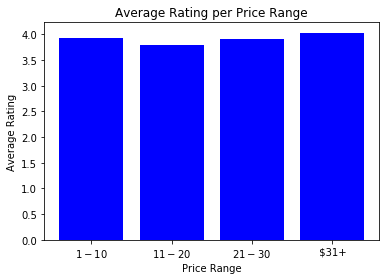

In [64]:
#Plot for Average Rating vs Price Range 
price = ["$1-$10", "$11-$20", "$21-$30", " $31+"]
x_axis = np.arange(len(price))
average_rating = [3.937057, 3.792747, 3.904517, 4.031915]
plt.bar(x_axis, average_rating, color="b", align="center")
plt.title('Average Rating per Price Range')
plt.ylabel('Average Rating')
plt.xlabel('Price Range')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, price )
plt.savefig(../Images)


([<matplotlib.axis.XTick at 0xac2aa60ef0>,
 <a list of 4 Text xticklabel objects>)

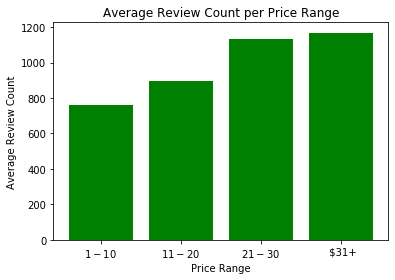

In [65]:
price = ["$1-$10", "$11-$20", "$21-$30", " $31+"]
average_reviews = [759.363475, 894.756482, 1135.550308, 1168.212766]
x_axis = np.arange(len(average_reviews))
plt.bar(x_axis, average_reviews, color="g", align="center")
plt.title('Average Review Count per Price Range')
plt.ylabel('Average Review Count')
plt.xlabel('Price Range')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, price )

([<matplotlib.axis.XTick at 0xac2aab01d0>,
 <a list of 8 Text xticklabel objects>)

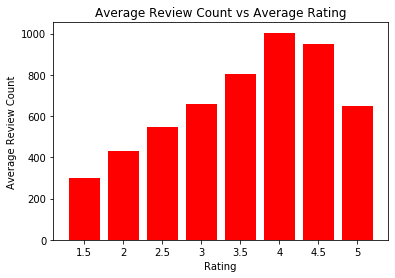

In [66]:
rating = ["1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]
average_reviews_rating = [300.000000, 429.545455, 547.840909, 657.438017, 805.779777, 1004.157484, 950.435789, 647.750000]
x_axis = np.arange(len(average_reviews_rating))
plt.bar(x_axis, average_reviews_rating, color="r", align="center")

plt.title('Average Review Count vs Average Rating')
plt.ylabel('Average Review Count')
plt.xlabel('Rating')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, rating )

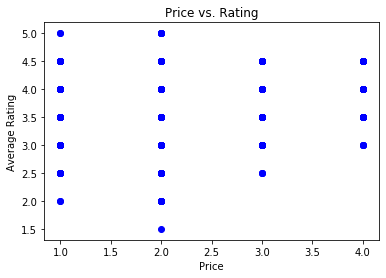

In [71]:
plt.scatter(restaurants_df["Price Value"], restaurants_df["Rating"], color="blue")
plt.title("Price vs. Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

In [80]:
# Plots of Price vs. Average Number of Reviews

average_reviews = pd.DataFrame(restaurants_df.groupby('Price Values')['Reviews'].mean())
average_reviews

,Reviews
Price Values,
1,759.363475
2,894.756482
3,1135.550308
4,1168.212766


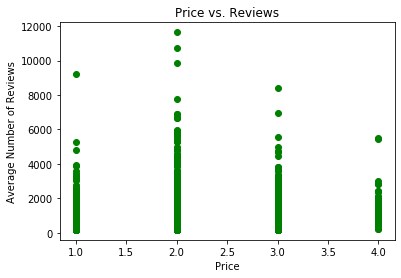

In [82]:
plt.scatter(restaurants_df["Price Value"], restaurants_df["Reviews"], color="green")
plt.title("Price vs. Reviews")
plt.xlabel("Price")
plt.ylabel("Average Number of Reviews")
plt.show()

In [83]:
# Plots of Rating vs. Average Number of Reviews

average_reviews_rating = pd.DataFrame(restaurants_df.groupby('Rating')['Reviews'].mean())
average_reviews_rating

,Reviews
Rating,
1.5,300.000000
2.0,429.545455
2.5,547.840909
3.0,657.438017
3.5,805.779777
4.0,1004.157484
4.5,950.435789
5.0,647.750000


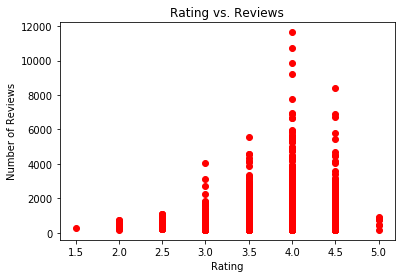

In [86]:
plt.scatter(restaurants_df["Rating"], restaurants_df["Reviews"], color="red")
plt.title("Rating vs. Reviews")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

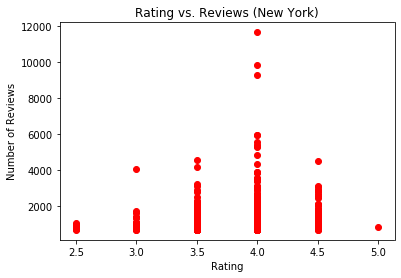

In [89]:
plt.scatter(newyork_df["Rating"], newyork_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (New York)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

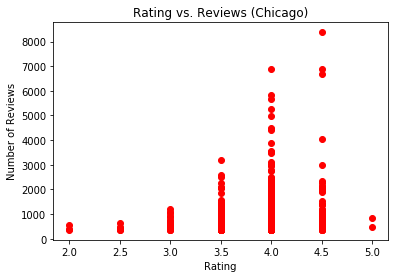

In [90]:
plt.scatter(chicago_df["Rating"], chicago_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (Chicago)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

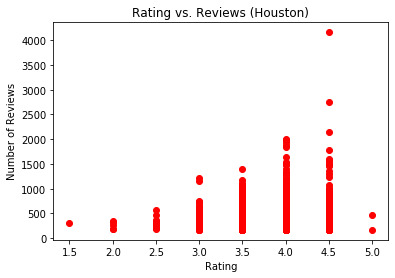

In [91]:
plt.scatter(houston_df["Rating"], houston_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (Houston)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

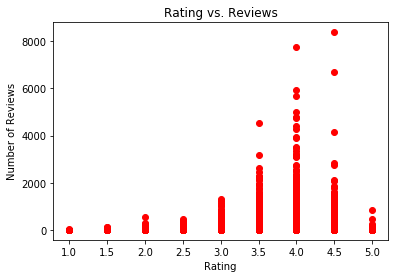

In [67]:
plt.scatter(sanfran_df["Rating"], sanfran_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (San Francisco)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

Text(0.5, 1.0, 'Review Percentage per city')

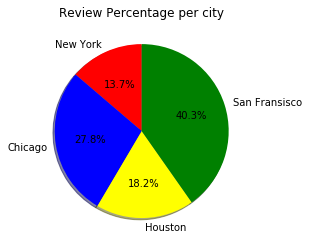

In [77]:
#Pie Chart Review Percentage per city
newyork_totalreviews = newyork_df['Reviews'].sum()
chicago_totalreviews = chicago_df['Reviews'].sum()
houston_totalreviews = houston_df['Reviews'].sum()
sanfran_totalreviews = sanfran_df['Reviews'].sum()
totalreviews = []
totalreviews.append(newyork_totalreviews)
totalreviews.append(chicago_totalreviews)
totalreviews.append(houston_totalreviews)
totalreviews.append(sanfran_totalreviews)
labels = ['New York', 'Chicago','Houston', 'San Fransisco']
colors = ['Red', 'Blue', 'Yellow' , 'Green']
plt.pie(totalreviews, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, shadow = True)
plt.title('Review Percentage per city')
